In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Loading and preprocessing Dataset

In [2]:
df = pd.read_csv("data/SeoulBikeData.csv")
df = df.drop(["Date", "Holiday", "Seasons"], axis=1)
cols = [
    "bike_count", "hour", "temp",
    "humidity","wind", "visibility",
    "dew_pt_temp", "radiation", "rain",
    "snow", "functional",
]
df.columns = cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop("hour", axis=1)
df = df.drop(["wind", "visibility", "functional"], axis=1)
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


## Train, Test, Valid Split

In [3]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

def get_xy(dataframe: pd.DataFrame, y_label, x_labels=None):
    dataframe = dataframe.copy()
    if x_labels is None:
        X = dataframe[[c for c in dataframe.columns if c != y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1)
        else:
            X = dataframe[x_labels].values

    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((X, y))

    return data, X, y

print(train.shape)
print(valid.shape)
print(test.shape)

(219, 7)
(73, 7)
(73, 7)


## Multiple Linear Regression

In [4]:
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_valid_all, y_valid_all = get_xy(valid, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

### Miltiple linear model

In [5]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

### Result of R^2 score

In [6]:
print(all_reg.score(X_test_all, y_test_all))

0.3432392742922147


## Plot the predicted vs test values

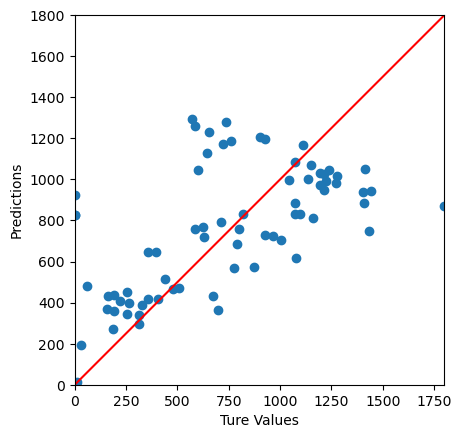

In [7]:
y_pred = all_reg.predict(X_test_all)
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred, label="NN Preds")
plt.xlabel("Ture Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims, c="red")
plt.show()